In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np

In [2]:
class rotationNN(torch.nn.Module):
    def __init__(self, num_layers=1, bias=False) -> None:
        super().__init__()
        self.layers = torch.nn.ParameterList()
        self.bias = bias
        for i in range(num_layers):
            layer = torch.nn.Linear(2,2, bias=bias)
            self.layers.append(layer)
    
    def forward(self, x):
        #print(x.shape)
        for layer in self.layers:
            x = layer(x)
        return x
    
    def print_weights(self):
        string_layer = ""
        for i, layer in enumerate(self.layers):
            string_layer+= f"Layer {i+1}:\n"
            string_layer+="     Weights:\n"
            string_layer+=f"     {layer.weight.data}\n"
            if self.bias == True:
                string_layer+="     Bias:\n"
                string_layer+=f"     {layer.bias.data}\n"
        return string_layer
    
def rotation(phi, points, origin = np.zeros(shape=(1,1))):
    p_rot = points - origin
    x_new = np.cos(phi)*p_rot[:,0]-np.sin(phi)*p_rot[:,1]
    y_new = np.sin(phi)*p_rot[:,0]+np.cos(phi)*p_rot[:,1]
    return (np.array([x_new, y_new]).T + origin)


def loss_func(train_data, model_pred):
    return torch.mean(torch.linalg.norm(train_data-model_pred, axis=1))

def train_model(model, train_data, rotated_data, optimizer, N_steps=5000,loss_func=loss_func):
    loss_vals = []
    for step in range(N_steps):
        optimizer.zero_grad()
        loss = loss_func(rotated_data, model.forward(train_data))
        loss_vals.append(loss)
        loss.backward()
        optimizer.step()
    return loss_vals

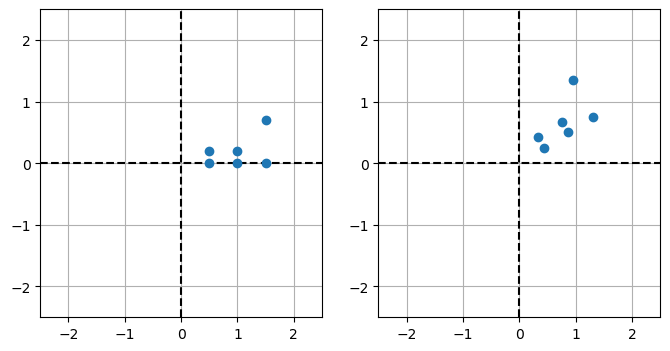

In [13]:
fig, axs = plt.subplots(1,2, figsize=(8,4))
points = np.array([[0.5,0.0],[1.0,0.0],[1.5,0.0],[0.5,0.2],[1.0,0.2],[1.5,0.7]])
for ax in axs:
    ax.grid()
    ax.set_xlim([-2.5,2.5])
    ax.set_ylim([-2.5,2.5])
    ax.hlines(0.0,-2.5,2.5, linestyles="--", color="k")
    ax.vlines(0.0,-2.5,2.5, linestyles="--", color="k")

rot_points = rotation(phi=np.pi/6.0, points=points, origin=np.array([0.0,0.0]))
axs[0].plot(points[:,0], points[:,1], 'o')
axs[1].plot(rot_points[:,0], rot_points[:,1], 'o')

In [14]:
rot_NNs = [rotationNN(num_layers=1, bias=False), rotationNN(num_layers=1, bias=True)]
for rot_NN in rot_NNs:
    optimizer = torch.optim.Adam(params=rot_NN.parameters())
    loss_vals = train_model(model=rot_NN, train_data=torch.tensor(points, dtype=torch.float), rotated_data=torch.tensor(rot_points, dtype=torch.float), optimizer=optimizer)

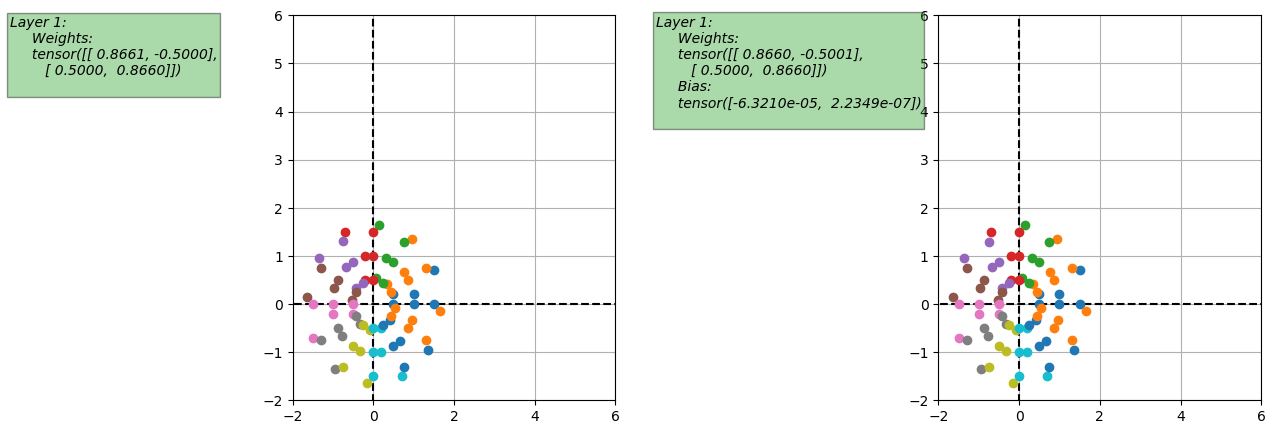

In [25]:
fig, axs = plt.subplots(1,2, figsize=(12.5,5))
points_tensor = torch.tensor(points, dtype=torch.float)
for ax in axs:
    ax.grid()
    ax.set_xlim([-2.0,6.0])
    ax.set_ylim([-2.0,6.0])
    ax.hlines(0.0,-2.5,6.5, linestyles="--", color="k")
    ax.vlines(0.0,-2.5,6.5, linestyles="--", color="k")

with torch.no_grad():
    for ax, rot_NN in zip(axs, rot_NNs):
        points_rot = points_tensor
        ax.plot(points_tensor[:,0], points_tensor[:,1], 'o')
        ax.text(-9, 6.0, rot_NN.print_weights(), style='italic', verticalalignment="top",
            bbox={'facecolor': 'C2', 'alpha': 0.4, 'pad': 2})  
        for i in range(11):
            points_rot = rot_NN.forward(points_rot)
            ax.plot(points_rot[:,0], points_rot[:,1], 'o')
fig.subplots_adjust(wspace=1.0)

In [6]:
rot_NNs = [rotationNN(num_layers=2, bias=True), rotationNN(num_layers=2, bias=True), rotationNN(num_layers=2, bias=True)]
for rot_NN in rot_NNs:
    optimizer = torch.optim.Adam(params=rot_NN.parameters())
    loss_vals = train_model(model=rot_NN, train_data=torch.tensor(points, dtype=torch.float), rotated_data=torch.tensor(rot_points, dtype=torch.float), optimizer=optimizer)

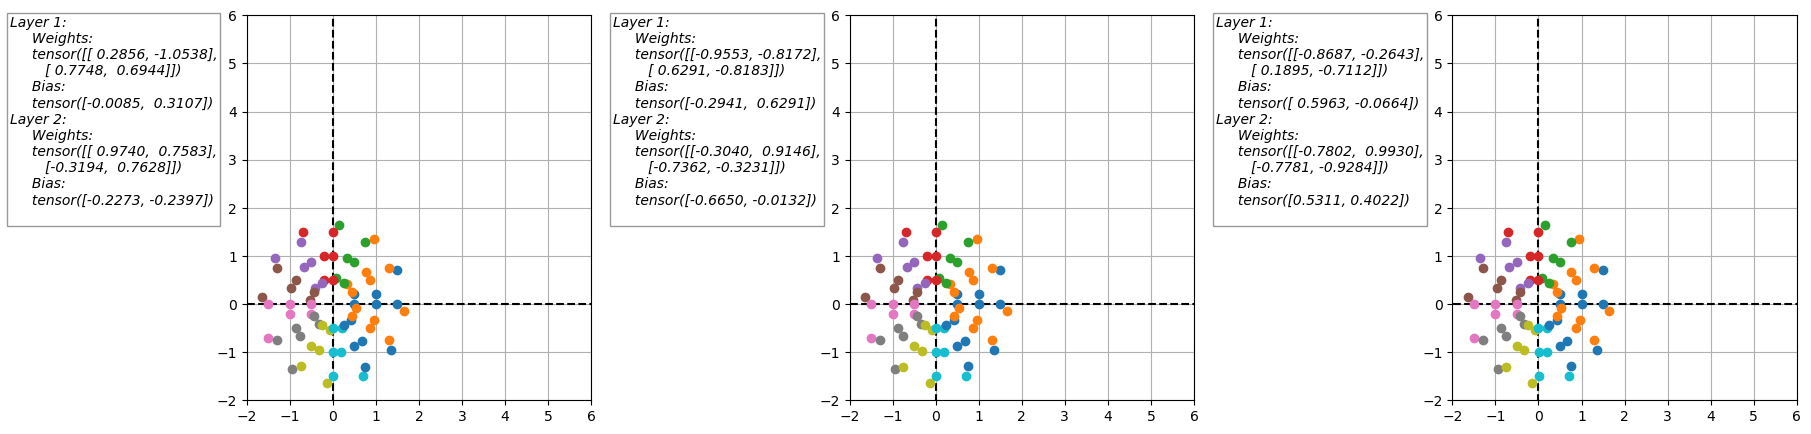

In [7]:
fig, axs = plt.subplots(1,3, figsize=(20,5))
points_tensor = torch.tensor(points, dtype=torch.float)
for ax in axs:
    ax.grid()
    ax.set_xlim([-2.0,6.0])
    ax.set_ylim([-2.0,6.0])
    ax.hlines(0.0,-2.5,6.5, linestyles="--", color="k")
    ax.vlines(0.0,-2.5,6.5, linestyles="--", color="k")

with torch.no_grad():
    for ax, rot_NN in zip(axs, rot_NNs):
        points_rot = points_tensor
        ax.plot(points_tensor[:,0], points_tensor[:,1], 'o')
        ax.text(-7.5, 6.0, rot_NN.print_weights(), style='italic', verticalalignment="top",
            bbox={'facecolor': 'white', 'alpha': 0.4, 'pad': 2})  
        for i in range(11):
            points_rot = rot_NN.forward(points_rot)
            ax.plot(points_rot[:,0], points_rot[:,1], 'o')
fig.subplots_adjust(wspace=.75)

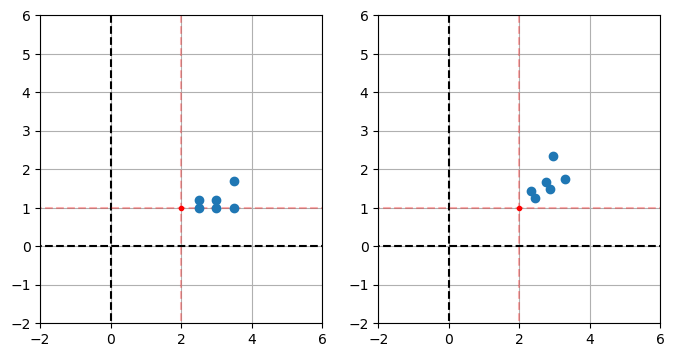

In [27]:
fig, axs = plt.subplots(1,2, figsize=(8,4))
points = np.array([[0.5,0.0],[1.0,0.0],[1.5,0.0],[0.5,0.2],[1.0,0.2],[1.5,0.7]]) + np.array([2.0,1.0])
for ax in axs:
    ax.grid()
    ax.set_xlim([-2.0,6.0])
    ax.set_ylim([-2.0,6.0])
    ax.hlines(0.0,-2.5,6.5, linestyles="--", color="k")
    ax.vlines(0.0,-2.5,6.5, linestyles="--", color="k")
    ax.vlines(2.0, -2.5,6.5, linestyles="--", color="red", alpha=0.3)
    ax.hlines(1.0, -2.5,6.5, linestyles="--", color= "red", alpha=0.3)
    ax.plot(2.0,1.0, "o", c="red", markersize=3.0)

rot_points = rotation(phi=np.pi/6.0, points=points, origin=np.array([2.0,1.0]))
axs[0].plot(points[:,0], points[:,1], 'o')
axs[1].plot(rot_points[:,0], rot_points[:,1], 'o')

In [30]:
rot_NNs = [rotationNN(num_layers=1, bias=False), rotationNN(num_layers=1, bias=True)]
for rot_NN in rot_NNs:
    optimizer = torch.optim.Adam(params=rot_NN.parameters())
    loss_vals = train_model(model=rot_NN, train_data=torch.tensor(points, dtype=torch.float), rotated_data=torch.tensor(rot_points, dtype=torch.float), optimizer=optimizer, N_steps=10000)

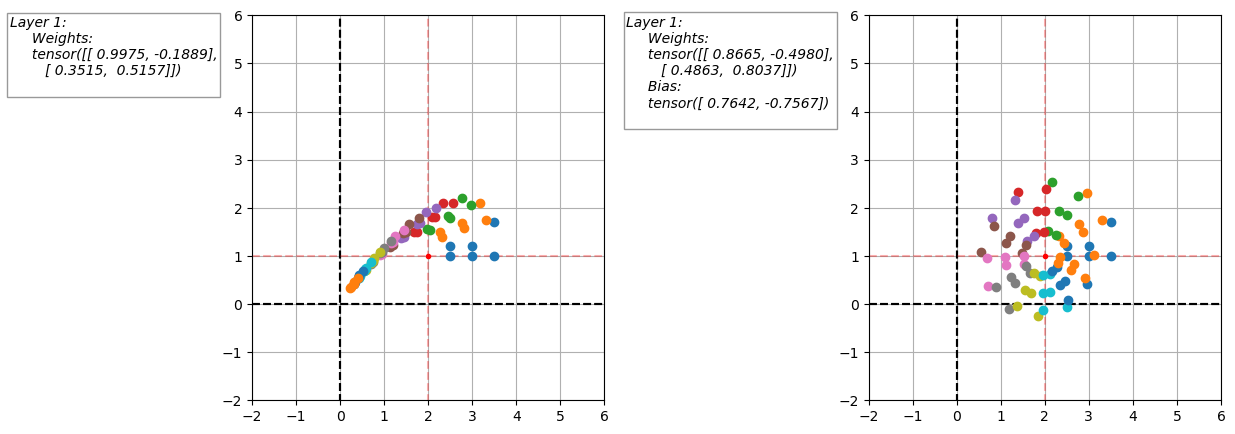

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(12.5,5))
points_tensor = torch.tensor(points, dtype=torch.float)
for ax in axs:
    ax.grid()
    ax.set_xlim([-2.0,6.0])
    ax.set_ylim([-2.0,6.0])
    ax.hlines(0.0,-2.5,6.5, linestyles="--", color="k")
    ax.vlines(0.0,-2.5,6.5, linestyles="--", color="k")
    ax.hlines(0.0,-2.5,6.5, linestyles="--", color="k")
    ax.vlines(0.0,-2.5,6.5, linestyles="--", color="k")
    ax.vlines(2.0, -2.5,6.5, linestyles="--", color="red", alpha=0.3)
    ax.hlines(1.0, -2.5,6.5, linestyles="--", color= "red", alpha=0.3)
    ax.plot(2.0,1.0, "o", c="red", markersize=3.0)

with torch.no_grad():
    for ax, rot_NN in zip(axs, rot_NNs):
        points_rot = points_tensor
        ax.plot(points_tensor[:,0], points_tensor[:,1], 'o')
        ax.text(-7.5, 6.0, rot_NN.print_weights(), style='italic', verticalalignment="top",
            bbox={'facecolor': 'white', 'alpha': 0.4, 'pad': 2})  
        for i in range(11):
            points_rot = rot_NN.forward(points_rot)
            ax.plot(points_rot[:,0], points_rot[:,1], 'o')
fig.subplots_adjust(wspace=.75)